# Permutation Test
***

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd
import numpy as np

***
### Part 1 - Using the dataset from the video (mosquitos_data.csv) in the folder, write Python code to:
**1.1 Create side-by-side boxplots for the number of mosquitos in each group (beer vs water)**

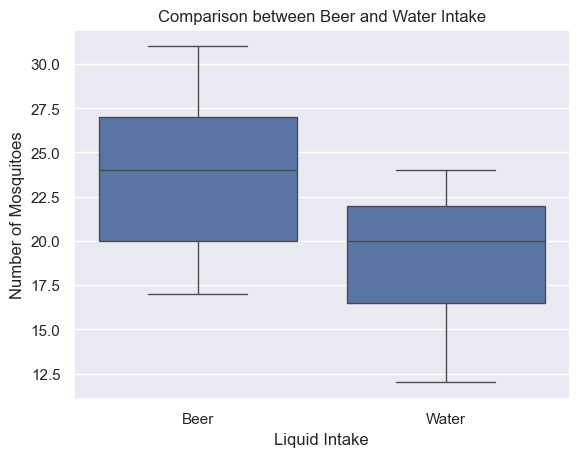

In [12]:
df = pd.read_csv("mosquitos_data.csv")
sns.boxplot(data=df,x="Treatment",y="Response").set(title="Comparison between Beer and Water Intake",
                                                   xlabel="Liquid Intake", ylabel="Number of Mosquitoes");

**1.2. What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.**

The graph shows the comparison of mosquitoes attractiveness between beer drinkers and water drinkers.

The total number of mosquitoes recorded for this experiment ranges between 12 and 31. For the beer drinking group, the response is noted between 17 and 31 which is higher than that for water drinkers, which is between 12 and 24. Therefore, based on initial inspection, this suggests that **there is an association between beer consumption and attractiveness to mosquitos** (i.e. mosquitoes are more attracted to beer drinkers).

To further support this statement, it can be seen that the median of the beer group is almost **in line** with the maximum value of their counterpart. In addition, its entire interquartile range is **higher** than the median of the water group. This shows that there are more mosquitoes attracted to beer drinkers than water drinkers.

**1.3 Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.**

In [3]:
df.rename(columns = {'Response':'Number of Mosquitoes'}).groupby("Treatment").describe()

Number of Mosquitoes                                               \
                         count       mean       std   min   25%   50%   75%   
Treatment                                                                     
Beer                      25.0  23.600000  4.133199  17.0  20.0  24.0  27.0   
Water                     18.0  19.222222  3.671120  12.0  16.5  20.0  22.0   

                 
            max  
Treatment        
Beer       31.0  
Water      24.0

Mean corresponds to the average of a data set. Therefore, based on the experiment, the average number of mosquitos attracted to beer drinkers is 23.6 and it is higher than that for the water drinkers, which is 19.2. This information provides an early/preliminary suggestion that mosquitoes are more attracted to beer drinkers than water drinkers.

Median corresponds to the middle value of the data set in ascending order. For beer drinkers, it is 24.0 whereas for water drinkers it is 20.0. Since the mean and the median for both groups are almost the same (23.6 vs 24.0 and 19.2 vs 20.0), their dataset is more or less evenly distributed from the lowest to highest values.

Standard deviation corresponds to the degree of dispersion of a data set relative to its mean. For the beer and water drinking groups, it is 4.13 and 3.67 respectively. Since the standard deviation of the beer drinker is higher, this indicates that their mosquitoes attractiveness are more spread out than water drinkers. The difference between the means of two treatments is around 4 mosquitos, which corresponds to the standard deviation of 4 mosquitos, for both treatment variables.

***
### Part 2 - Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

In [ ]:
# Split treatment groups
beer = df[df["Treatment"]=="Beer"]
water = df[df["Treatment"]=="Water"]

# Extract 'Response' column from the dataset as an array
water_array = np.array(water["Response"])
beer_array = np.array(beer["Response"])

# Count treatment groups
water_count = max(water_array.shape)
beer_count = max(beer_array.shape)

# Obtain the original mean difference from the experiment
original_mean = float(beer.mean() - water.mean())

# Combine the two treatment groups together
mosquito = np.append(water_array,beer_array)

# Initialize
k = 0 # count if simulated differences >= 4.4
results = [] # store simulated difference
n = 10000 # number of simulations

for _ in range(n):
    # shuffle the array items
    np.random.shuffle(mosquito)
    
    # split into two subgroups and compute the difference of means
    temp_mean = np.mean(mosquito[:beer_count]) - np.mean(mosquito[beer_count:])
    
    # append the calculated mean to results list
    results.append(temp_mean)
    
    # count if mean >= 4.4
    if temp_mean >= 4.4:
        k+=1

In [4]:
# Split treatment groups
beer = df[df["Treatment"]=="Beer"]
water = df[df["Treatment"]=="Water"]

# Extract 'Response' column from the dataset as an array
water_array = np.array(water["Response"])
beer_array = np.array(beer["Response"])

# Count treatment groups
water_count = max(water_array.shape)
beer_count = max(beer_array.shape)

In [5]:
# Obtain the original mean difference from the experiment
original_mean = float(beer.mean() - water.mean())

# Combine the two treatment groups together
mosquito = np.append(water_array,beer_array)

# Initialize
k = 0 # count if simulated differences >= 4.4
results = [] # store simulated difference
n = 10000 # number of simulations

for _ in range(n):
    # shuffle the array items
    np.random.shuffle(mosquito)
    
    # split into two subgroups and compute the difference of means
    temp_mean = np.mean(mosquito[:beer_count]) - np.mean(mosquito[beer_count:])
    
    # append the calculated mean to results list
    results.append(temp_mean)
    
    # count if mean >= 4.4
    if temp_mean >= 4.4:
        k+=1

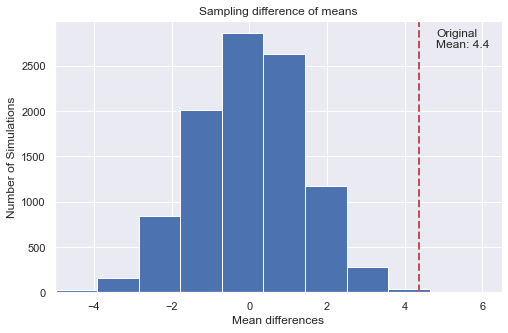

In [6]:
plt.figure(figsize=(8,5))
plt.hist(results)
plt.axvline(original_mean, color='r',linestyle='dashed',linewidth=2)
_, max_ylim = plt.ylim()
plt.xlim([-5,6.5])
plt.text(original_mean*1.1, max_ylim*0.9, 'Original\nMean: %.1f'%original_mean)
plt.title('Sampling difference of means')
plt.xlabel('Mean differences')
plt.ylabel('Number of Simulations');

In [7]:
print("Total number of simulations: %i" % n)
print("Total number of times simulated mean is higher than 4.4: %i " % k)
print("The probability of obtaining the experiment outcome: %.2f%%" % (k/n*100))

Total number of simulations: 10000
Total number of times simulated mean is higher than 4.4: 2 
The probability of obtaining the experiment outcome: 0.02%


**Since the calculated probability is too small, it can be concluded that it is very unlikely to get such an observation by chance and the skeptical ‘no association’ hypothesis can be rejected.**
<br><br>End
***